<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/AutomatedTrading/BTC_Trading_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/Fintech_AI/master/data/btc_Kmeans_2020_07_05.csv')
df.head()

,Unnamed: 0,BlkCnt,IssTotNtv,SplyCur,TxTfrValAdjUSD,CapMrktCurUSD,NVTAdj90,PriceUSD,FeeTotUSD,IssTotUSD,AdrActCnt,Volume,Type,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1year,1-2year,2-3year,3-5year,>5year,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Five-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
0,2009-01-03,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#set "date" column as the index
df.set_index('Unnamed: 0', inplace=True)
#to remove the name of the index
df.index.name=None
df.tail()

,BlkCnt,IssTotNtv,SplyCur,TxTfrValAdjUSD,CapMrktCurUSD,NVTAdj90,PriceUSD,FeeTotUSD,IssTotUSD,AdrActCnt,Volume,Type,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1year,1-2year,2-3year,3-5year,>5year,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Five-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2020-06-28,150.0,937.50,1.841734e+07,1.044929e+09,1.677464e+11,84.965505,9108.065675,178764.564868,8.538812e+06,686270.0,1.456087e+10,BTC,1.883975,1.560580e+10,21.670843,8.717576e+06,1.854689e+10,52.718677,4.709665e+11,1.933909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027537,0.031297,0.033409,0.033409,NaN,NaN,NaN,NaN,NaN,-3.438650,3.951551,41.497578,27.076373,NaN,NaN,NaN,NaN
2020-06-29,145.0,906.25,1.841825e+07,1.825444e+09,1.691578e+11,85.628193,9184.247366,308429.074080,8.323224e+06,962232.0,1.646055e+10,BTC,1.879341,1.828599e+10,21.383505,8.631653e+06,1.855552e+10,53.691440,9.258904e+11,0.991937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027077,0.031259,0.033407,0.033407,NaN,NaN,NaN,NaN,NaN,-5.235760,6.146684,42.781408,28.081423,NaN,NaN,NaN,NaN
2020-06-30,147.0,918.75,1.841917e+07,2.063592e+09,1.684243e+11,84.979256,9143.967585,407570.997824,8.401020e+06,926238.0,1.573580e+10,BTC,1.878009,1.779939e+10,21.318103,8.808591e+06,1.856433e+10,52.384807,8.579168e+11,1.065834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026666,0.031133,0.033284,0.033284,NaN,NaN,NaN,NaN,NaN,-3.073754,3.257085,37.645885,31.628006,NaN,NaN,NaN,NaN
2020-07-01,162.0,1012.50,1.842018e+07,2.197590e+09,1.702271e+11,85.716151,9241.339612,573024.429645,9.356856e+06,1078007.0,1.597155e+10,BTC,1.889464,1.816914e+10,20.887828,9.929881e+06,1.857426e+10,46.966900,1.162099e+12,0.795228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021887,0.031114,0.033233,0.033233,NaN,NaN,NaN,NaN,NaN,-9.390948,2.941402,36.047259,26.328760,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.633892e+10,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018210,0.031087,0.033219,0.033219,NaN,NaN,NaN,NaN,NaN,-2.849002,3.872675,36.870157,25.849557,NaN,NaN,NaN,NaN


In [21]:
df.index=pd.to_datetime(df.index)

In [22]:
# Initialize the short and long windows
short_window = 60
long_window = 180

In [23]:
# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

In [24]:
####After the preparatory work, it’s time to create the set of short and long simple moving averages over the respective long and short time windows. Make use of the rolling() function to start your rolling window calculations: within the function, specify the window and the min_period, and set the center argument. In practice, this will result in a rolling() function to which you have passed either short_window or long_window, 1 as the minimum number of observations in the window that are required to have a value, and False, so that the labels are not set at the center of the window. Next, don’t forget to also chain the mean() function so that you calculate the rolling mean.
# Create short simple moving average over the short window
signals['short_mavg'] = df['PU Ratio'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = df['PU Ratio'].rolling(window=long_window, min_periods=1, center=False).mean()

In [25]:
# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0) 

In [26]:
# Generate trading orders
signals['positions'] = signals['signal'].diff()

In [27]:
# Print `signals`
print(signals)

            signal  short_mavg   long_mavg  positions
2009-01-03     0.0         NaN         NaN        NaN
2009-01-04     0.0         NaN         NaN        0.0
2009-01-05     0.0         NaN         NaN        0.0
2009-01-06     0.0         NaN         NaN        0.0
2009-01-07     0.0         NaN         NaN        0.0
2009-01-08     0.0         NaN         NaN        0.0
2009-01-09     0.0         NaN         NaN        0.0
2009-01-10     0.0         NaN         NaN        0.0
2009-01-11     0.0         NaN         NaN        0.0
2009-01-12     0.0         NaN         NaN        0.0
2009-01-13     0.0         NaN         NaN        0.0
2009-01-14     0.0         NaN         NaN        0.0
2009-01-15     0.0         NaN         NaN        0.0
2009-01-16     0.0         NaN         NaN        0.0
2009-01-17     0.0         NaN         NaN        0.0
2009-01-18     0.0         NaN         NaN        0.0
2009-01-19     0.0         NaN         NaN        0.0
2009-01-20     0.0         N

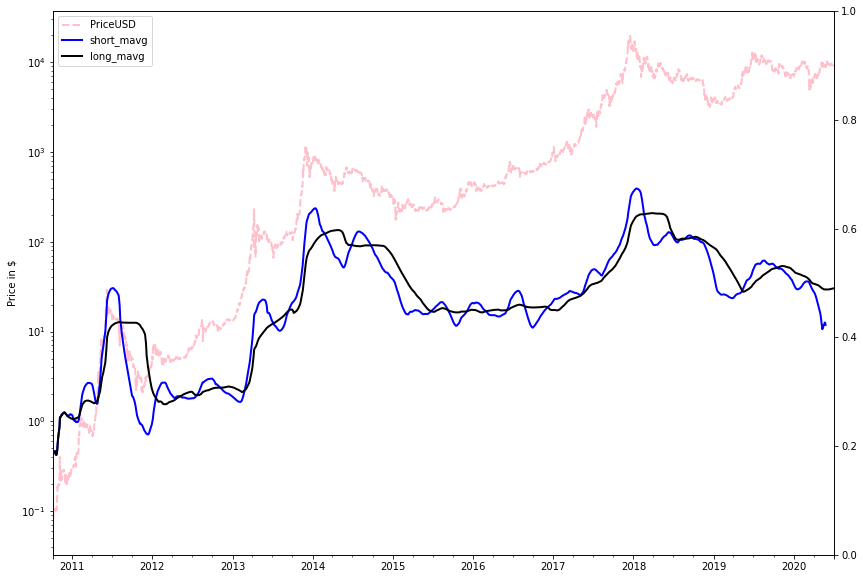

In [28]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
df['PriceUSD']['2010-10-05':].plot(ax=ax1, color='pink', lw=2.,figsize=(14, 10),linestyle='--',legend=True)

ax2=ax1.twinx()
# Plot the short and long moving averages
ax2=signals['short_mavg']['2010-10-05':].plot(ax=ax1, color='blue', lw=2.,figsize=(14, 10),legend=True)
ax2=signals['long_mavg']['2010-10-05':].plot(ax=ax1, color='black', lw=2.,figsize=(14, 10),legend=True)         
       
# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=20, color='green')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=20, color='red')
ax1.set_yscale('log')
ax2.set_yscale('log')
         
# Show the plot
plt.show()

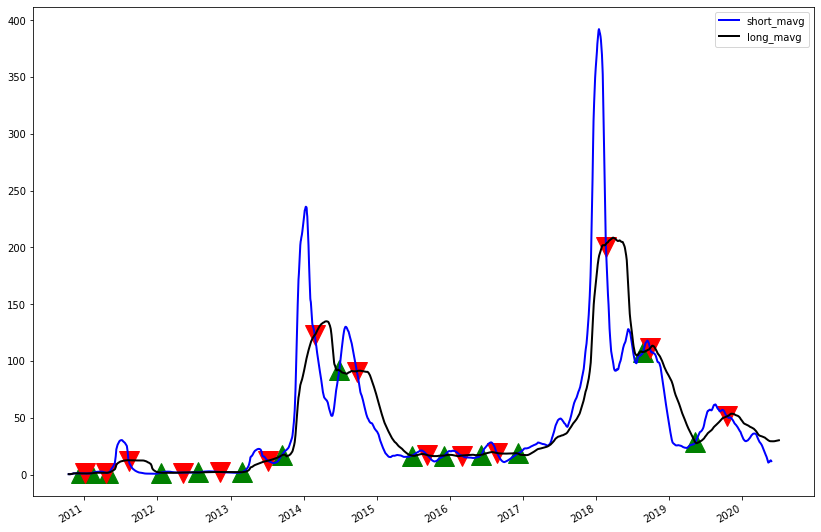

In [29]:
# Plot the buy signals
fig, ax1 =plt.subplots()
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=20, color='green')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=20, color='red')
ax1=signals['short_mavg']['2010-10-05':].plot(ax=ax1, color='blue', lw=2.,figsize=(14, 10),legend=True)
ax1=signals['long_mavg']['2010-10-05':].plot(ax=ax1, color='black', lw=2.,figsize=(14, 10),legend=True) 
plt.savefig('Market_Timing_Strategy')

In [30]:
signals.loc[signals.positions == 1.0].index

DatetimeIndex(['2010-12-14', '2011-02-05', '2011-04-30', '2012-01-19',
               '2012-07-22', '2013-02-26', '2013-09-13', '2014-06-28',
               '2015-06-25', '2015-12-05', '2016-06-05', '2016-12-07',
               '2018-08-24', '2019-05-12'],
              dtype='datetime64[ns]', freq=None)

In [31]:
signals.loc[signals.positions == -1.0].index

DatetimeIndex(['2011-01-06', '2011-04-20', '2011-08-11', '2012-05-10',
               '2012-11-07', '2013-07-07', '2014-02-25', '2014-09-24',
               '2015-09-11', '2016-03-01', '2016-08-24', '2018-02-19',
               '2018-09-27', '2019-10-18'],
              dtype='datetime64[ns]', freq=None)

In [32]:
signals.loc[signals.positions == -1.0].index-signals.loc[signals.positions == 1.0].index

TimedeltaIndex([ '23 days',  '74 days', '103 days', '112 days', '108 days',
                '131 days', '165 days',  '88 days',  '78 days',  '87 days',
                 '80 days', '439 days',  '34 days', '159 days'],
               dtype='timedelta64[ns]', freq=None)

In [33]:
(signals.loc[signals.positions == -1.0].index-signals.loc[signals.positions == 1.0].index).mean()

Timedelta('120 days 01:42:51.428571')

In [34]:
(signals.loc[signals.positions == -1.0].index-signals.loc[signals.positions == 1.0].index).min()

Timedelta('23 days 00:00:00')

In [35]:
(signals.loc[signals.positions == -1.0].index-signals.loc[signals.positions == 1.0].index).max()

Timedelta('439 days 00:00:00')

In [51]:
####First off, you’ll create set a variable initial_capital to set your initial capital and a new DataFrame positions. Once again, you copy the index from another DataFrame; In this case, this is the signals DataFrame because you want to consider the time frame for which you have generated the signals.
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

In [52]:
###Next, you create a new column AAPL in the DataFrame. On the days that the signal is 1 and the short moving average crosses the long moving average (for the period greater than the shortest moving average window), you’ll buy a 100 shares. The days on which the signal is 0, the final result will be 0 as a result of the operation 100*signals['signal'].
# Buy 10 BTC
positions['BTC'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned 
##A new DataFrame portfolio is created to store the market value of an open position.
portfolio = positions.multiply(df['PriceUSD'], axis=0)
# Store the difference in shares owned 
pos_diff = positions.diff()

In [53]:
###test
portfolio.loc['2017-09-01':'2017-12-01']

,BTC
2017-09-01,4.918166e+05
2017-09-02,4.595020e+05
2017-09-03,4.625296e+05
2017-09-04,4.374753e+05
2017-09-05,4.454053e+05
2017-09-06,4.607517e+05
2017-09-07,4.635112e+05
2017-09-08,4.345458e+05
2017-09-09,4.335593e+05
2017-09-10,4.261844e+05


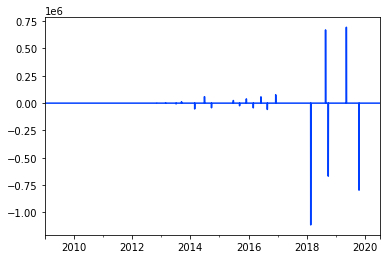

In [54]:
(pos_diff.multiply(df['PriceUSD'], axis=0)).sum(axis=1).plot()

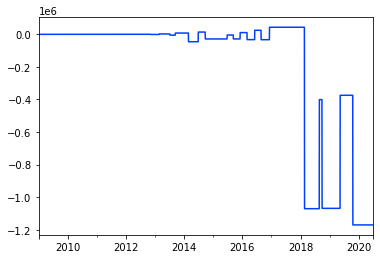

In [55]:
(pos_diff.multiply(df['PriceUSD'], axis=0)).sum(axis=1).cumsum().plot()

In [56]:
# Add `holdings` to portfolio
####hen the real backtesting begins: you create a new column to the portfolio DataFrame with name holdings, which stores the value of the positions or shares you have bought, multiplied by the ‘Adj Close’ price.
portfolio['holdings'] = (positions.multiply(df['PriceUSD'],axis=0)).sum(axis=1)

In [57]:
###Your portfolio also contains a cash column, which is the capital that you still have left to spend: it is calculated by taking your initial_capital and subtracting your holdings (the price that you paid for buying stock).
# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['PriceUSD'], axis=0)).sum(axis=1).cumsum()-(((pos_diff.multiply(df['PriceUSD'], axis=0)).sum(axis=1)).abs()*0.001).cumsum()

In [58]:
# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

In [59]:
# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
###test
portfolio.loc['2017-09-01':'2017-12-01']

,BTC,holdings,cash,total,returns
2017-09-01,4.918166e+05,4.918166e+05,55930.886803,5.477475e+05,0.033551
2017-09-02,4.595020e+05,4.595020e+05,55930.886803,5.154329e+05,-0.058995
2017-09-03,4.625296e+05,4.625296e+05,55930.886803,5.184605e+05,0.005874
2017-09-04,4.374753e+05,4.374753e+05,55930.886803,4.934062e+05,-0.048324
2017-09-05,4.454053e+05,4.454053e+05,55930.886803,5.013361e+05,0.016072
2017-09-06,4.607517e+05,4.607517e+05,55930.886803,5.166825e+05,0.030611
2017-09-07,4.635112e+05,4.635112e+05,55930.886803,5.194421e+05,0.005341
2017-09-08,4.345458e+05,4.345458e+05,55930.886803,4.904767e+05,-0.055763
2017-09-09,4.335593e+05,4.335593e+05,55930.886803,4.894902e+05,-0.002011
2017-09-10,4.261844e+05,4.261844e+05,55930.886803,4.821152e+05,-0.015067


In [60]:
portfolio.columns

Index(['BTC', 'holdings', 'cash', 'total', 'returns'], dtype='object')

In [61]:
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [62]:
plt.style.use('seaborn-bright')

In [63]:
portfolio[['holdings', 'cash', 'total']].describe()

,holdings,cash,total
count,4.199000e+03,4.199000e+03,4.199000e+03
mean,9.674785e+04,2.935596e+05,3.903075e+05
std,2.731488e+05,4.064801e+05,4.789220e+05
min,0.000000e+00,5.593089e+04,9.998182e+04
25%,0.000000e+00,9.962901e+04,1.005325e+05
50%,0.000000e+00,1.000000e+05,1.282014e+05
75%,2.466166e+04,1.325062e+05,4.270854e+05
max,1.964051e+06,1.265613e+06,2.019982e+06


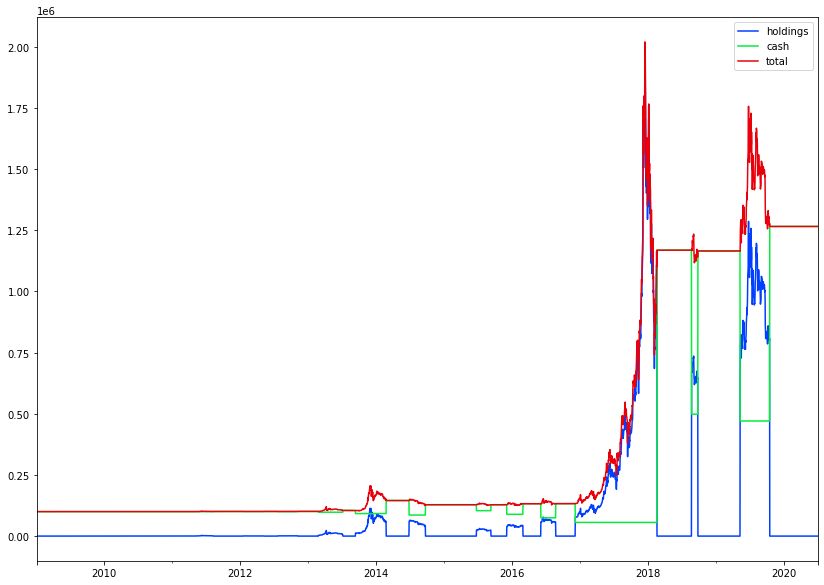

In [64]:
portfolio[['holdings', 'cash', 'total']].plot(figsize=(14, 10),legend=True)
plt.savefig('Market_timing')

In [65]:
portfolio[['holdings', 'cash', 'total']].tail()

,holdings,cash,total
2020-06-28,0.0,1.265613e+06,1.265613e+06
2020-06-29,0.0,1.265613e+06,1.265613e+06
2020-06-30,0.0,1.265613e+06,1.265613e+06
2020-07-01,0.0,1.265613e+06,1.265613e+06
2020-07-02,0.0,1.265613e+06,1.265613e+06


In [66]:
###buy and hold
# Create a DataFrame `positions`
positions_Default = pd.DataFrame(index=signals.index).fillna(100)
positions_Default['BTC']=100
positions_Default['BTC']

2009-01-03    100
2009-01-04    100
2009-01-05    100
2009-01-06    100
2009-01-07    100
2009-01-08    100
2009-01-09    100
2009-01-10    100
2009-01-11    100
2009-01-12    100
2009-01-13    100
2009-01-14    100
2009-01-15    100
2009-01-16    100
2009-01-17    100
2009-01-18    100
2009-01-19    100
2009-01-20    100
2009-01-21    100
2009-01-22    100
2009-01-23    100
2009-01-24    100
2009-01-25    100
2009-01-26    100
2009-01-27    100
2009-01-28    100
2009-01-29    100
2009-01-30    100
2009-01-31    100
2009-02-01    100
2009-02-02    100
2009-02-03    100
2009-02-04    100
2009-02-05    100
2009-02-06    100
2009-02-07    100
2009-02-08    100
2009-02-09    100
2009-02-10    100
2009-02-11    100
2009-02-12    100
2009-02-13    100
2009-02-14    100
2009-02-15    100
2009-02-16    100
2009-02-17    100
2009-02-18    100
2009-02-19    100
2009-02-20    100
2009-02-21    100
2009-02-22    100
2009-02-23    100
2009-02-24    100
2009-02-25    100
2009-02-26    100
2009-02-27

In [67]:
##A new DataFrame portfolio is created to store the market value of an open position.
portfolio_Default = positions_Default.multiply(df['PriceUSD'], axis=0)
portfolio_Default

,BTC
2009-01-03,NaN
2009-01-04,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
2009-01-08,NaN
2009-01-09,NaN
2009-01-10,NaN
2009-01-11,NaN
2009-01-12,NaN


In [68]:
portfolio_Default['cash'] = initial_capital -portfolio['BTC'].loc['2010-10-05']*1.001
portfolio_Default['cash'] 

2009-01-03    100000.0
2009-01-04    100000.0
2009-01-05    100000.0
2009-01-06    100000.0
2009-01-07    100000.0
2009-01-08    100000.0
2009-01-09    100000.0
2009-01-10    100000.0
2009-01-11    100000.0
2009-01-12    100000.0
2009-01-13    100000.0
2009-01-14    100000.0
2009-01-15    100000.0
2009-01-16    100000.0
2009-01-17    100000.0
2009-01-18    100000.0
2009-01-19    100000.0
2009-01-20    100000.0
2009-01-21    100000.0
2009-01-22    100000.0
2009-01-23    100000.0
2009-01-24    100000.0
2009-01-25    100000.0
2009-01-26    100000.0
2009-01-27    100000.0
2009-01-28    100000.0
2009-01-29    100000.0
2009-01-30    100000.0
2009-01-31    100000.0
2009-02-01    100000.0
2009-02-02    100000.0
2009-02-03    100000.0
2009-02-04    100000.0
2009-02-05    100000.0
2009-02-06    100000.0
2009-02-07    100000.0
2009-02-08    100000.0
2009-02-09    100000.0
2009-02-10    100000.0
2009-02-11    100000.0
2009-02-12    100000.0
2009-02-13    100000.0
2009-02-14    100000.0
2009-02-15 

In [69]:
portfolio_Default['holding']=positions_Default.multiply(df['PriceUSD'], axis=0)

In [70]:
portfolio_Default['total']=portfolio_Default['cash'] + portfolio_Default['holding']

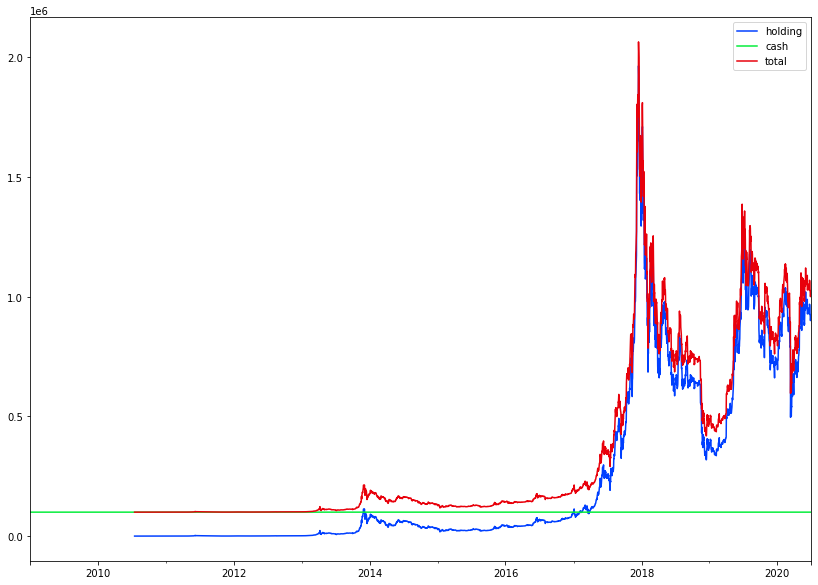

In [71]:
portfolio_Default[['holding', 'cash', 'total']].plot(figsize=(14, 10),legend=True)
plt.savefig('Buy_and_hold')

In [72]:
portfolio_Default.tail()

,BTC,cash,holding,total
2020-06-28,910806.567458,100000.0,910806.567458,1.010807e+06
2020-06-29,918424.736628,100000.0,918424.736628,1.018425e+06
2020-06-30,914396.758530,100000.0,914396.758530,1.014397e+06
2020-07-01,924133.961239,100000.0,924133.961239,1.024134e+06
2020-07-02,NaN,100000.0,NaN,NaN


In [73]:
# Add `returns` to portfolio
portfolio_Default['returns'] = portfolio_Default['total'].pct_change()

In [74]:
ROI = portfolio['total'].loc['2020-02-13']/initial_capital-1
ROI

11.656125084259923

In [75]:
ROI_Default = portfolio_Default['total'].loc['2020-02-13']/initial_capital-1
ROI_Default

10.235497322618398

In [76]:
(ROI-ROI_Default)

1.4206277616415246

In [77]:
signals.loc[signals.index == '2020-02-13'].index-signals.loc[signals.index == '2010-10-05'].index

TimedeltaIndex(['3418 days'], dtype='timedelta64[ns]', freq=None)

In [78]:
annualized_ROI=((1 + ROI)**(365/3418))-1
annualized_ROI

0.3113301514036637

In [79]:
vol = portfolio['total'].pct_change().std() * np.sqrt(365)
vol

0.3236400675088945

In [80]:
annualized_ROI_Default=((1 + ROI_Default)**(365/3418))-1
annualized_ROI_Default

0.29476283594181596

In [81]:
vol_Default = portfolio_Default['total'].pct_change().std() * np.sqrt(365)
vol_Default

0.44771390228297964

In [82]:
SR=annualized_ROI/vol
SR

0.9619641776743465

In [83]:
SR_Default=annualized_ROI_Default/vol_Default
SR_Default

0.658373203152199

In [84]:
(SR-SR_Default)/SR_Default

0.4611229209642741